In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score
print(tf.__version__)

2.3.0


In [2]:
import tensorflow as tf
from keras.utils import np_utils

fashion_mnist = tf.keras.datasets.fashion_mnist

# load the training and test data    
(tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

# reshape the feature data
tr_x = tr_x.reshape(tr_x.shape[0], 784)
te_x = te_x.reshape(te_x.shape[0], 784)

# noramlise feature data
tr_x = tr_x / 255.0
te_x = te_x / 255.0

print( "Shape of training features ", tr_x.shape)
print( "Shape of test features ", te_x.shape)


# one hot encode the training labels and get the transpose
tr_y = np_utils.to_categorical(tr_y,10)
tr_y = tr_y.T
print ("Shape of training labels ", tr_y.shape)

# one hot encode the test labels and get the transpose
te_y = np_utils.to_categorical(te_y,10)
te_y = te_y.T
print ("Shape of testing labels ", te_y.shape)

Shape of training features  (60000, 784)
Shape of test features  (10000, 784)
Shape of training labels  (10, 60000)
Shape of testing labels  (10, 10000)


In [3]:
# Converting the numpy arrays to tensors
tr_x = tf.convert_to_tensor(tr_x, dtype=tf.float64)
tr_y = tf.convert_to_tensor(tr_y, dtype=tf.float64)
te_x = tf.convert_to_tensor(te_x, dtype=tf.float64)
te_y = tf.convert_to_tensor(te_y, dtype=tf.float64)

In [4]:
# Implementation of softmax
def softmax(previous_activations):
    t = tf.cast(tf.exp(previous_activations), tf.float64) # Numerator part of the softmax (exp(x))
    pred_probabilities = tf.cast(t / tf.reduce_sum(t, axis = 0), tf.float64) # Summing along the rows (each column represents one data point)
    return pred_probabilities

In [5]:
def forward_pass(data, W1, b1, W2, b2, W3, b3):
    # Push the data through first hidden layer of the network and applying relu activation on it
    hypothesis_hidden_layer1 = tf.cast(tf.matmul(W1, tf.transpose(data)) + b1, tf.float64)
    activations_hidden_layer1 = tf.cast(tf.nn.relu(hypothesis_hidden_layer1), tf.float64)

    # Push the ouput of hidden layer 1 through the hidden layer2 with relu activation function
    hypothesis_hidden_layer2 = tf.cast(tf.matmul(W2, activations_hidden_layer1) + b2, tf.float64)
    activations_hidden_layer2 = tf.cast(tf.nn.relu(hypothesis_hidden_layer2), tf.float64)

    # Push the ouput of hidden layer 2 through the output layer with softmax activation function
    hypothesis_output_layer = tf.cast(tf.matmul(W3, activations_hidden_layer2) + b3, tf.float64)
    class_probabilities = tf.cast(softmax(hypothesis_output_layer), tf.float64)
    
    # returning the predictions
    return class_probabilities

In [6]:
def cross_entropy(_predictions, _true_labels):
    # Computing negative log likelihood, adding a small number within the log function to avoid log(0)
    loss = tf.cast(tf.reduce_mean(-tf.reduce_sum(_true_labels * tf.math.log(_predictions+1e-7), axis=0)), tf.float64)
    return loss

In [7]:
def calculate_accuracy(true_labels, predictions):
    predictions = tf.round(predictions) # Rounding off the decimal representation of softmax output to nearest integer(>0.5 to 1 and <0.5 to 0)
    
    # argmax to get the index of the predicted array, axis = 0 to get the index for each data point prediction
    accuracy = tf.cast(accuracy_score(np.argmax(predictions, axis = 0), np.argmax(true_labels, axis = 0)), tf.float64)
    return accuracy

In [8]:
# lists to store the loss and accuracy for train and test data
tr_loss = []
te_loss = []
tr_accuracy = []
te_accuracy = []

# Function to iterate and update the weigths and bias values using adam optimizer
def train(tr_x, W1, b1, W2, b2, W3, b3, tr_y, te_x, te_y):
    max_iterations = 1000
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    for i in range(max_iterations):
        # Record the computation
        with tf.GradientTape() as tape:
            predictions = forward_pass(tr_x, W1, b1, W2, b2, W3, b3)
            train_loss = cross_entropy(predictions, tr_y)

        # Calculate the gradients
        gradients = tape.gradient(train_loss, [W1, b1, W2, b2, W3, b3])
        train_accuracy = calculate_accuracy(tr_y, predictions)

        test_predictions = forward_pass(te_x, W1, b1, W2, b2, W3, b3)
        test_loss = cross_entropy(test_predictions, te_y)
        test_accuracy = calculate_accuracy(te_y, test_predictions)
        
        tr_loss.append(train_loss)
        te_loss.append(test_loss)

        tr_accuracy.append(train_accuracy)
        te_accuracy.append(test_accuracy)

        # update the weights and bias values as per calculated gradients
        adam_optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2, W3, b3]))
        
        print("Iteraions {}: train_loss: {} train_accuracy: {} test_loss: {} test_accuracy: {}".format(i, train_loss, train_accuracy, test_loss, test_accuracy))

In [9]:
# Defining the model
no_of_features = tr_x.shape[1]
no_of_neurons_hidden_layer1 = 300
no_of_neurons_hidden_layer2 = 100
no_of_output_units = 10

# Declaring weights and bias for the NN
W1 = tf.Variable(tf.random.normal(shape=(no_of_neurons_hidden_layer1, no_of_features), seed=0, dtype=tf.float64) * 0.01)
b1 = tf.Variable([0], dtype=tf.float64)

W2 = tf.Variable(tf.random.normal(shape=(no_of_neurons_hidden_layer2, no_of_neurons_hidden_layer1), seed=0, dtype=tf.float64) * 0.01)
b2 = tf.Variable([0], dtype=tf.float64)

W3 = tf.Variable(tf.random.normal(shape=(no_of_output_units, no_of_neurons_hidden_layer2), seed=0, dtype=tf.float64) * 0.01)
b3 = tf.Variable([0], dtype=tf.float64)

In [17]:
# Call train function and run it for specified number of iterations (max_iterations = 1000)
train(tr_x, W1, b1, W2, b2, W3, b3, tr_y, te_x, te_y)

Iteraions 0: train_loss: 2.3025705562061978 train_accuracy: 0.1 test_loss: 2.3025653557555805 test_accuracy: 0.1
Iteraions 1: train_loss: 2.299457030884008 train_accuracy: 0.1 test_loss: 2.299463112088303 test_accuracy: 0.1
Iteraions 2: train_loss: 2.2936570666728673 train_accuracy: 0.1 test_loss: 2.293674709536964 test_accuracy: 0.1
Iteraions 3: train_loss: 2.283829050544252 train_accuracy: 0.1 test_loss: 2.2838773069304428 test_accuracy: 0.1
Iteraions 4: train_loss: 2.26885085731762 train_accuracy: 0.1 test_loss: 2.268955541215196 test_accuracy: 0.1
Iteraions 5: train_loss: 2.2470377608010352 train_accuracy: 0.1 test_loss: 2.2472251297064125 test_accuracy: 0.1
Iteraions 6: train_loss: 2.21688015559587 train_accuracy: 0.1 test_loss: 2.2171835161597295 test_accuracy: 0.1
Iteraions 7: train_loss: 2.1774419169627075 train_accuracy: 0.1 test_loss: 2.177901647432932 test_accuracy: 0.1
Iteraions 8: train_loss: 2.127893451591306 train_accuracy: 0.1 test_loss: 2.128562399838693 test_accuracy:

Iteraions 65: train_loss: 0.6528397507632249 train_accuracy: 0.6875166666666667 test_loss: 0.6789829155878798 test_accuracy: 0.6817
Iteraions 66: train_loss: 0.6473289500949779 train_accuracy: 0.6931666666666667 test_loss: 0.6738229191987656 test_accuracy: 0.6837
Iteraions 67: train_loss: 0.6413664543060368 train_accuracy: 0.6968833333333333 test_loss: 0.6680696203609757 test_accuracy: 0.6891
Iteraions 68: train_loss: 0.6358037355055208 train_accuracy: 0.7003333333333334 test_loss: 0.6627959251143902 test_accuracy: 0.6912
Iteraions 69: train_loss: 0.630617645672649 train_accuracy: 0.7025 test_loss: 0.6579440391840886 test_accuracy: 0.6936
Iteraions 70: train_loss: 0.6252021214171657 train_accuracy: 0.70555 test_loss: 0.652533041417634 test_accuracy: 0.6966
Iteraions 71: train_loss: 0.6199344873703949 train_accuracy: 0.7118166666666667 test_loss: 0.6474325559698134 test_accuracy: 0.7012
Iteraions 72: train_loss: 0.6149555311809796 train_accuracy: 0.7102833333333334 test_loss: 0.64302872

Iteraions 129: train_loss: 0.45508345058719607 train_accuracy: 0.8111333333333334 test_loss: 0.49267704564259 test_accuracy: 0.7951
Iteraions 130: train_loss: 0.4454366136143822 train_accuracy: 0.8133333333333334 test_loss: 0.48091093784883887 test_accuracy: 0.7998
Iteraions 131: train_loss: 0.4504810779120859 train_accuracy: 0.8099 test_loss: 0.485498733249991 test_accuracy: 0.799
Iteraions 132: train_loss: 0.4429887544484252 train_accuracy: 0.8152166666666667 test_loss: 0.47958890810349275 test_accuracy: 0.7989
Iteraions 133: train_loss: 0.44582859942584396 train_accuracy: 0.8150833333333334 test_loss: 0.48316114356439666 test_accuracy: 0.7992
Iteraions 134: train_loss: 0.44114087236561383 train_accuracy: 0.8148333333333333 test_loss: 0.4766629324452834 test_accuracy: 0.8003
Iteraions 135: train_loss: 0.44188652692790464 train_accuracy: 0.8148333333333333 test_loss: 0.47731500030905816 test_accuracy: 0.802
Iteraions 136: train_loss: 0.43874877741344814 train_accuracy: 0.8176833333333

Iteraions 192: train_loss: 0.3830242107692934 train_accuracy: 0.8435833333333334 test_loss: 0.423317633043724 test_accuracy: 0.8259
Iteraions 193: train_loss: 0.3823194249111583 train_accuracy: 0.8444 test_loss: 0.4230669639403377 test_accuracy: 0.8271
Iteraions 194: train_loss: 0.3817695123532423 train_accuracy: 0.8436333333333333 test_loss: 0.42213825241503045 test_accuracy: 0.8266
Iteraions 195: train_loss: 0.381438761804411 train_accuracy: 0.84525 test_loss: 0.42261970746491606 test_accuracy: 0.8284
Iteraions 196: train_loss: 0.3812105616902723 train_accuracy: 0.84315 test_loss: 0.42165151708793175 test_accuracy: 0.8258
Iteraions 197: train_loss: 0.3808744770798835 train_accuracy: 0.8459333333333333 test_loss: 0.422318349451448 test_accuracy: 0.8289
Iteraions 198: train_loss: 0.37983115892131475 train_accuracy: 0.84365 test_loss: 0.4204975041967056 test_accuracy: 0.8274
Iteraions 199: train_loss: 0.3781377239081656 train_accuracy: 0.8467 test_loss: 0.4196221284984409 test_accuracy:

Iteraions 256: train_loss: 0.3360739040904981 train_accuracy: 0.8645666666666667 test_loss: 0.38486358935978326 test_accuracy: 0.8436
Iteraions 257: train_loss: 0.33577823625365183 train_accuracy: 0.8634333333333334 test_loss: 0.38413500077425705 test_accuracy: 0.8432
Iteraions 258: train_loss: 0.3349465563218451 train_accuracy: 0.8650833333333333 test_loss: 0.3841056781612788 test_accuracy: 0.8435
Iteraions 259: train_loss: 0.3338220579806509 train_accuracy: 0.8643833333333333 test_loss: 0.3826438338163689 test_accuracy: 0.8439
Iteraions 260: train_loss: 0.3328778155771396 train_accuracy: 0.86555 test_loss: 0.3821215573925411 test_accuracy: 0.8437
Iteraions 261: train_loss: 0.3323233055969793 train_accuracy: 0.86605 test_loss: 0.38178313541320325 test_accuracy: 0.8445
Iteraions 262: train_loss: 0.33201960237686495 train_accuracy: 0.865 test_loss: 0.3813788591623045 test_accuracy: 0.8441
Iteraions 263: train_loss: 0.3316932943025244 train_accuracy: 0.86645 test_loss: 0.3817383311419285

Iteraions 320: train_loss: 0.3017419293784918 train_accuracy: 0.8777333333333334 test_loss: 0.3627209851529359 test_accuracy: 0.8539
Iteraions 321: train_loss: 0.30158648104734803 train_accuracy: 0.8784833333333333 test_loss: 0.36279826478696187 test_accuracy: 0.8545
Iteraions 322: train_loss: 0.30134455560698753 train_accuracy: 0.8778 test_loss: 0.3626675622672168 test_accuracy: 0.8542
Iteraions 323: train_loss: 0.3009311006196251 train_accuracy: 0.8784833333333333 test_loss: 0.3625431090994125 test_accuracy: 0.8548
Iteraions 324: train_loss: 0.30026054157492765 train_accuracy: 0.8785333333333334 test_loss: 0.36204038349844936 test_accuracy: 0.8549
Iteraions 325: train_loss: 0.29961626795296953 train_accuracy: 0.8788666666666667 test_loss: 0.3614805377646918 test_accuracy: 0.8549
Iteraions 326: train_loss: 0.2991480126133918 train_accuracy: 0.8795833333333334 test_loss: 0.3614295940449336 test_accuracy: 0.855
Iteraions 327: train_loss: 0.2988911093676754 train_accuracy: 0.878683333333

Iteraions 384: train_loss: 0.2741488357716571 train_accuracy: 0.8890333333333333 test_loss: 0.34888806415945894 test_accuracy: 0.8623
Iteraions 385: train_loss: 0.2741618182119049 train_accuracy: 0.8889833333333333 test_loss: 0.3493056728976535 test_accuracy: 0.8622
Iteraions 386: train_loss: 0.2742486656856062 train_accuracy: 0.8886 test_loss: 0.34938508653381706 test_accuracy: 0.8631
Iteraions 387: train_loss: 0.2739649565491167 train_accuracy: 0.8894 test_loss: 0.3496011860221827 test_accuracy: 0.8628
Iteraions 388: train_loss: 0.2735647159252534 train_accuracy: 0.889 test_loss: 0.34915256139218315 test_accuracy: 0.8633
Iteraions 389: train_loss: 0.27259181760423207 train_accuracy: 0.8896666666666667 test_loss: 0.34858253878888346 test_accuracy: 0.8627
Iteraions 390: train_loss: 0.27170139813430516 train_accuracy: 0.89035 test_loss: 0.34785595014110415 test_accuracy: 0.8629
Iteraions 391: train_loss: 0.27079422875710396 train_accuracy: 0.8904833333333333 test_loss: 0.347077519449301

Iteraions 448: train_loss: 0.2509095553062887 train_accuracy: 0.8984166666666666 test_loss: 0.33998560365647157 test_accuracy: 0.868
Iteraions 449: train_loss: 0.25056247152374683 train_accuracy: 0.8996333333333333 test_loss: 0.34026918186825217 test_accuracy: 0.8686
Iteraions 450: train_loss: 0.25027983591206954 train_accuracy: 0.8992666666666667 test_loss: 0.34003466860049675 test_accuracy: 0.8681
Iteraions 451: train_loss: 0.2500599711893604 train_accuracy: 0.8990166666666667 test_loss: 0.3400564310634719 test_accuracy: 0.8686
Iteraions 452: train_loss: 0.24982633293434833 train_accuracy: 0.8996666666666666 test_loss: 0.3401575287730782 test_accuracy: 0.8687
Iteraions 453: train_loss: 0.24964800655515032 train_accuracy: 0.8990333333333334 test_loss: 0.34009218476883485 test_accuracy: 0.8682
Iteraions 454: train_loss: 0.24932217161760084 train_accuracy: 0.8998166666666667 test_loss: 0.34008360903665397 test_accuracy: 0.8687
Iteraions 455: train_loss: 0.24910463777087932 train_accurac

Iteraions 512: train_loss: 0.23267043288421227 train_accuracy: 0.9067833333333334 test_loss: 0.3367712218739873 test_accuracy: 0.8716
Iteraions 513: train_loss: 0.23297989061289337 train_accuracy: 0.9077 test_loss: 0.33770100060136093 test_accuracy: 0.8706
Iteraions 514: train_loss: 0.23330036279078223 train_accuracy: 0.9059166666666667 test_loss: 0.3377877460281367 test_accuracy: 0.8716
Iteraions 515: train_loss: 0.23325147233061744 train_accuracy: 0.9069666666666667 test_loss: 0.33823113403473654 test_accuracy: 0.8706
Iteraions 516: train_loss: 0.23211111763170236 train_accuracy: 0.9073 test_loss: 0.33716964163099206 test_accuracy: 0.8723
Iteraions 517: train_loss: 0.23105983717808123 train_accuracy: 0.9074166666666666 test_loss: 0.336226795851351 test_accuracy: 0.8706
Iteraions 518: train_loss: 0.23019667989840073 train_accuracy: 0.9085166666666666 test_loss: 0.33583504588342755 test_accuracy: 0.8723
Iteraions 519: train_loss: 0.2299236537358012 train_accuracy: 0.9077666666666667 te

Iteraions 575: train_loss: 0.21629727831310902 train_accuracy: 0.9145666666666666 test_loss: 0.33565631180407063 test_accuracy: 0.8742
Iteraions 576: train_loss: 0.21595153734410347 train_accuracy: 0.9145 test_loss: 0.33541699906821426 test_accuracy: 0.8752
Iteraions 577: train_loss: 0.21586228248230716 train_accuracy: 0.9143166666666667 test_loss: 0.33572711730927896 test_accuracy: 0.8738
Iteraions 578: train_loss: 0.2159478534155612 train_accuracy: 0.9141833333333333 test_loss: 0.33591120698079524 test_accuracy: 0.8753
Iteraions 579: train_loss: 0.21651736820381193 train_accuracy: 0.9139333333333334 test_loss: 0.33695256204802365 test_accuracy: 0.8743
Iteraions 580: train_loss: 0.21707012301957757 train_accuracy: 0.9131333333333334 test_loss: 0.33764469963038984 test_accuracy: 0.8739
Iteraions 581: train_loss: 0.21818143519295474 train_accuracy: 0.91305 test_loss: 0.33917476524166257 test_accuracy: 0.8726
Iteraions 582: train_loss: 0.2183902959554201 train_accuracy: 0.91245 test_loss

Iteraions 638: train_loss: 0.20357786258427102 train_accuracy: 0.9200666666666667 test_loss: 0.33894461370750834 test_accuracy: 0.8741
Iteraions 639: train_loss: 0.20413595964724124 train_accuracy: 0.9195666666666666 test_loss: 0.3399989397706554 test_accuracy: 0.8751
Iteraions 640: train_loss: 0.20395183886689755 train_accuracy: 0.9202166666666667 test_loss: 0.34017172899914777 test_accuracy: 0.873
Iteraions 641: train_loss: 0.20279499415391802 train_accuracy: 0.9199333333333334 test_loss: 0.33906134632693685 test_accuracy: 0.8761
Iteraions 642: train_loss: 0.20164995626810747 train_accuracy: 0.9214666666666667 test_loss: 0.33817443055911306 test_accuracy: 0.8758
Iteraions 643: train_loss: 0.20090515999202663 train_accuracy: 0.9208 test_loss: 0.3375013730798288 test_accuracy: 0.8759
Iteraions 644: train_loss: 0.20093621214476215 train_accuracy: 0.9209833333333334 test_loss: 0.33772487590838157 test_accuracy: 0.8765
Iteraions 645: train_loss: 0.2014068716434263 train_accuracy: 0.921116

Iteraions 701: train_loss: 0.19015206419641834 train_accuracy: 0.9260333333333334 test_loss: 0.3406981163160416 test_accuracy: 0.8768
Iteraions 702: train_loss: 0.1899848553116573 train_accuracy: 0.92595 test_loss: 0.34098476321842824 test_accuracy: 0.8766
Iteraions 703: train_loss: 0.18981235097008387 train_accuracy: 0.9261833333333334 test_loss: 0.34077332415843237 test_accuracy: 0.8764
Iteraions 704: train_loss: 0.1895672813808188 train_accuracy: 0.9264166666666667 test_loss: 0.3411184789858651 test_accuracy: 0.8768
Iteraions 705: train_loss: 0.18923384542518445 train_accuracy: 0.9261333333333334 test_loss: 0.34070583391269393 test_accuracy: 0.8774
Iteraions 706: train_loss: 0.1888944096322507 train_accuracy: 0.9265833333333333 test_loss: 0.34078063036558925 test_accuracy: 0.8763
Iteraions 707: train_loss: 0.18870770022923986 train_accuracy: 0.9264 test_loss: 0.34080670024964477 test_accuracy: 0.8764
Iteraions 708: train_loss: 0.18867624437935457 train_accuracy: 0.9266333333333333 t

Iteraions 764: train_loss: 0.18572358992495058 train_accuracy: 0.9277166666666666 test_loss: 0.35113644994834065 test_accuracy: 0.8721
Iteraions 765: train_loss: 0.18087165235871977 train_accuracy: 0.9302 test_loss: 0.3469171935552199 test_accuracy: 0.8769
Iteraions 766: train_loss: 0.1805500153762033 train_accuracy: 0.9296833333333333 test_loss: 0.34680077161884265 test_accuracy: 0.8762
Iteraions 767: train_loss: 0.18338719098661593 train_accuracy: 0.9283166666666667 test_loss: 0.3497721636227166 test_accuracy: 0.872
Iteraions 768: train_loss: 0.18653397855284568 train_accuracy: 0.9271 test_loss: 0.35431622525940293 test_accuracy: 0.8757
Iteraions 769: train_loss: 0.18771024039280146 train_accuracy: 0.9267 test_loss: 0.3548221217861937 test_accuracy: 0.8715
Iteraions 770: train_loss: 0.18341939001572788 train_accuracy: 0.9288166666666666 test_loss: 0.3511190095138129 test_accuracy: 0.8771
Iteraions 771: train_loss: 0.1796164019116698 train_accuracy: 0.9308 test_loss: 0.346619193801156

Iteraions 827: train_loss: 0.17440085525513466 train_accuracy: 0.93235 test_loss: 0.3549315482999148 test_accuracy: 0.8767
Iteraions 828: train_loss: 0.17228891854497838 train_accuracy: 0.933 test_loss: 0.3526398817529346 test_accuracy: 0.876
Iteraions 829: train_loss: 0.17084765828552953 train_accuracy: 0.9341 test_loss: 0.3517150557873758 test_accuracy: 0.8759
Iteraions 830: train_loss: 0.17008971109020907 train_accuracy: 0.9336833333333333 test_loss: 0.3510691773083123 test_accuracy: 0.8765
Iteraions 831: train_loss: 0.17013837220508377 train_accuracy: 0.9349833333333334 test_loss: 0.3517451403963051 test_accuracy: 0.8754
Iteraions 832: train_loss: 0.17073431178654325 train_accuracy: 0.9334666666666667 test_loss: 0.3525586906103069 test_accuracy: 0.8761
Iteraions 833: train_loss: 0.17140806944064288 train_accuracy: 0.9339333333333333 test_loss: 0.353749137262562 test_accuracy: 0.8749
Iteraions 834: train_loss: 0.17257929664229754 train_accuracy: 0.9329833333333334 test_loss: 0.35498

Iteraions 890: train_loss: 0.17153407407480387 train_accuracy: 0.9327833333333333 test_loss: 0.36717062804887285 test_accuracy: 0.8729
Iteraions 891: train_loss: 0.17120316617134207 train_accuracy: 0.9336333333333333 test_loss: 0.3680056070501407 test_accuracy: 0.8752
Iteraions 892: train_loss: 0.17008616062690862 train_accuracy: 0.9336666666666666 test_loss: 0.36591404968015506 test_accuracy: 0.8741
Iteraions 893: train_loss: 0.16574822107755882 train_accuracy: 0.9363333333333334 test_loss: 0.3622555001635335 test_accuracy: 0.8762
Iteraions 894: train_loss: 0.16230036780601714 train_accuracy: 0.9375666666666667 test_loss: 0.35827658412749236 test_accuracy: 0.8752
Iteraions 895: train_loss: 0.16110656638125395 train_accuracy: 0.9382333333333334 test_loss: 0.3573219079746143 test_accuracy: 0.8759
Iteraions 896: train_loss: 0.1621461635131554 train_accuracy: 0.9385666666666667 test_loss: 0.35912871894356707 test_accuracy: 0.8758
Iteraions 897: train_loss: 0.16411439717450108 train_accura

Iteraions 953: train_loss: 0.15583452784014987 train_accuracy: 0.9413 test_loss: 0.3662473503581638 test_accuracy: 0.876
Iteraions 954: train_loss: 0.15513569398910473 train_accuracy: 0.9404 test_loss: 0.3652767836991693 test_accuracy: 0.8754
Iteraions 955: train_loss: 0.15436780886538956 train_accuracy: 0.94195 test_loss: 0.36516426542025876 test_accuracy: 0.8757
Iteraions 956: train_loss: 0.15411254236482338 train_accuracy: 0.9410666666666667 test_loss: 0.3646243745013024 test_accuracy: 0.8766
Iteraions 957: train_loss: 0.1543277395605063 train_accuracy: 0.9416666666666667 test_loss: 0.3654533461762147 test_accuracy: 0.876
Iteraions 958: train_loss: 0.15461444280117037 train_accuracy: 0.9406666666666667 test_loss: 0.3656610364372442 test_accuracy: 0.8768
Iteraions 959: train_loss: 0.1549597631286571 train_accuracy: 0.9410333333333334 test_loss: 0.36647984271764666 test_accuracy: 0.8765
Iteraions 960: train_loss: 0.154917804367574 train_accuracy: 0.94055 test_loss: 0.3665509746653515 

In [ ]:
len(tr_loss)

1000

In [ ]:
len(te_loss)

1000

In [18]:
import matplotlib.pyplot as plt

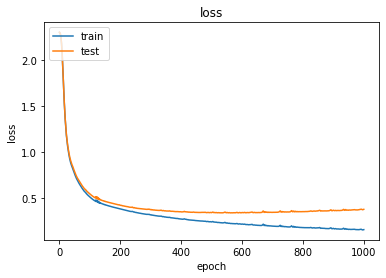

In [19]:
plt.plot(np.arange(1000), tr_loss)
plt.plot(np.arange(1000), te_loss)
plt.title("loss")
plt.xlabel('epoch')
plt.ylabel("loss")
plt.legend(['train', 'test'], loc='upper left')

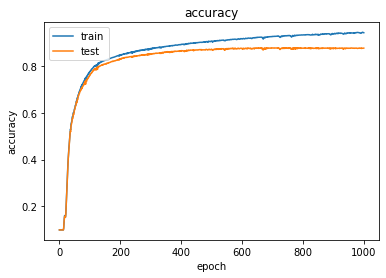

In [20]:
plt.plot(np.arange(1000), tr_accuracy)
plt.plot(np.arange(1000), te_accuracy)
plt.title("accuracy")
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.legend(['train', 'test'], loc='upper left')

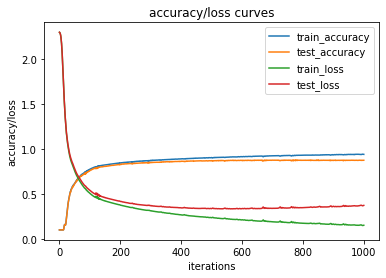

In [21]:
plt.plot(np.arange(1000), tr_accuracy)
plt.plot(np.arange(1000), te_accuracy)
plt.plot(np.arange(1000), tr_loss)
plt.plot(np.arange(1000), te_loss)
plt.title("accuracy/loss curves")
plt.xlabel('iterations')
plt.ylabel("accuracy/loss")
plt.legend(['train_accuracy', 'test_accuracy', 'train_loss', 'test_loss'], loc='upper right')

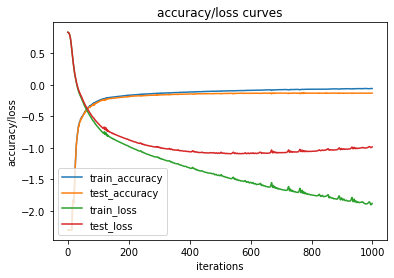

In [23]:
plt.plot(np.arange(1000), np.log(tr_accuracy))
plt.plot(np.arange(1000), np.log(te_accuracy))
plt.plot(np.arange(1000), np.log(tr_loss))
plt.plot(np.arange(1000), np.log(te_loss))
plt.title("accuracy/loss curves")
plt.xlabel('iterations')
plt.ylabel("accuracy/loss")
plt.legend(['train_accuracy', 'test_accuracy', 'train_loss', 'test_loss'])